#### Imbalanced Dataser
When observation in one class is higher than the observation in other classes then there exists a class imbalance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *

from collections import Counter

In [2]:
data = pd.read_csv('creditcard.csv')
data.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [3]:
data['Class'].value_counts() # Class count
# 1 means fraud is detected
# 0 means fraun is not detected

0    284315
1       492
Name: Class, dtype: int64

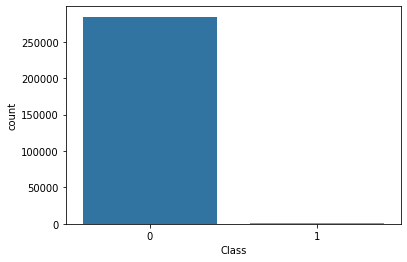

In [4]:
sns.countplot(data['Class'])
plt.show()

Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.

Class Imbalance appear in many domains, including:
- Fraud detection
- Spam filtering
- Disease screening
- SaaS subscription churn
- Advertising click-throughs

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the data set is imbalance then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place.

We have a dataset of credit card customers where we have to find out whether the credit card transaction was fraudulent or not.

But the problem is that fraud transaction is relatively rare, only 0.17% of the transaction is fraudulent.

In [5]:
print('% of values in each category: ')
round((data['Class'].value_counts('normalize'))*100,4)

% of values in each category: 


0    99.8273
1     0.1727
Name: Class, dtype: float64

In [6]:
#lets define x & y for the model 
X = data.drop(['Time' , 'V15' , 'V22' , 'Class'] , axis = 1)
Y = data['Class']
print('Shape of X: ' , X.shape)
print('Shape of Y: ' , Y.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Shape of X:  (284807, 27)
Shape of Y:  (284807,)
(199364, 27)
(85443, 27)
(199364,)
(85443,)


In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print('Training Data Score: ', LR.score(x_train, y_train))
print('Testing Data Score: ', LR.score(x_test, y_test))

print('\nConfusion Metrix')
print(confusion_matrix(y_test, LR.predict(x_test)))

print('\nClassification Report: ')
print(classification_report(y_test, LR.predict(x_test)))

Training Data Score:  0.999197447884272
Testing Data Score:  0.9991807403766253

Confusion Metrix
[[85275    10]
 [   60    98]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.91      0.62      0.74       158

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [9]:
print('Frauds predicted wrongly: ',
      confusion_matrix(y_test, LR.predict(x_test))[1:,:1]/(confusion_matrix(y_test, LR.predict(x_test))[1:,:1]+
                                                           confusion_matrix(y_test, LR.predict(x_test))[1:,1:]))
print('Frauds predicted rightly: ',
     confusion_matrix(y_test, LR.predict(x_test))[1:,1:]/(confusion_matrix(y_test, LR.predict(x_test))[1:,:1]+
                                                           confusion_matrix(y_test, LR.predict(x_test))[1:,1:]))

Frauds predicted wrongly:  [[0.37974684]]
Frauds predicted rightly:  [[0.62025316]]


As we can check the accuracy score is very high but 37% of the frauds are predicted wrongly.

To avoid such scenario, we need to balance the data before using it for the predictions.

In [10]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


#### 1. Random Under-Sampling
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

total class of 1 and 0:
1    492
0    492
Name: Class, dtype: int64


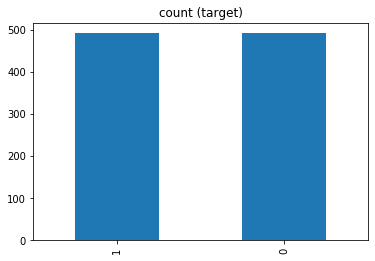

In [11]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",)# plot the count after under-sampeling
print(test_under['Class'].value_counts())
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

#### 2. Random Over-Sampling
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

total class of 1 and 0: 
1    284315
0    284315
Name: Class, dtype: int64


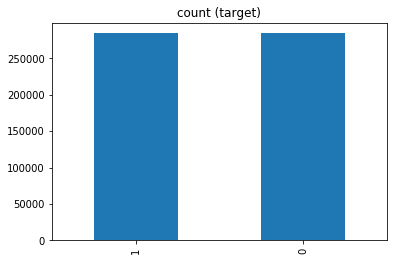

In [12]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0: ")# plot the count after under-sampeling
print(test_over['Class'].value_counts())
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

#### 3. Random under-sampling with imblearn
RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


#### 4. Random over-sampling with imblearn
One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


#### 5. Under-sampling: Tomek links
Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other

In [15]:
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


#### 6. Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


#### 7. NearMiss
NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

In [17]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, Y)

print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})
